            pm25
day             
2019-11-01    19
2019-11-01    20
2019-11-01    19
2019-11-01    20
2019-11-01    19
MEAN pm25 values by day
 day
2019-11-01    13.868956
2019-11-02    14.720946
2019-11-03    13.493046
2019-11-04     8.347947
2019-11-05     2.880056
2019-11-06     3.892136
2019-11-07     8.552301
2019-11-08    12.447075
2019-11-09    11.574320
2019-11-10    10.009059
2019-11-11     7.455115
2019-11-12    14.286509
2019-11-13    12.916667
2019-11-14    22.968663
2019-11-15    16.615866
2019-11-16    13.071627
2019-11-17    10.399443
2019-11-18    20.603340
2019-11-19    22.530271
2019-11-20    12.687938
2019-11-21     3.686411
2019-11-22     6.524313
2019-11-23    12.292276
2019-11-24     8.412256
2019-11-25     6.944367
2019-11-26    16.975644
2019-11-27    30.482566
2019-11-28    31.139179
2019-11-29    15.452830
2019-11-30    11.057063
Name: pm25, dtype: float64


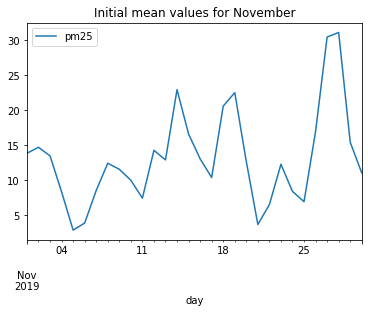

length of input values 30
y train [[13.86895585]
 [14.72094642]
 [13.4930459 ]
 [ 8.34794711]
 [ 2.88005579]
 [ 3.8921364 ]
 [ 8.55230126]
 [12.44707521]
 [11.57431961]
 [10.00905923]
 [ 7.45511482]
 [14.28650904]
 [12.91666667]
 [22.96866295]
 [16.61586639]
 [13.07162726]
 [10.39944328]
 [20.60334029]
 [22.5302714 ]
 [12.68793829]
 [ 3.68641115]]
y test [[ 6.5243129 ]
 [12.29227557]
 [ 8.41225627]
 [ 6.94436718]
 [16.9756437 ]
 [30.48256625]
 [31.13917884]
 [15.45283019]
 [11.05706333]]
length of train values 21
length of test values 9


NotImplementedError: AR has been removed from statsmodels and replaced with statsmodels.tsa.ar_model.AutoReg.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
from pmdarima.model_selection import train_test_split
from statsmodels.tsa.ar_model import AR, AR_DEPRECATION_WARN
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import plotly.graph_objs as go
import warnings
import itertools

warnings.filterwarnings('ignore')


# predictions for 9 days(using MEAN values of November)
# convert date to datetime format
def parser(x):
    return datetime.strptime(x, '%d/%m/%Y')


# read csv file
data = pd.read_csv('final_dataframe.csv',
                   parse_dates=['day'], index_col='day', date_parser=parser)

# drop unnecessary columns
cols_to_drop = ['time', 'latitude', 'longitude', 'altitude', 'o3', 'co2', 'temperature', 'pm1', 'pm10', 'ch2o',
                'pressure', 'readable time']
data = data.drop(cols_to_drop, axis=1)
# print day and pm 2.5 values
print(data.head())

# group df by day
grp_date = data.groupby('day')

# calculate mean value of pm2.5  for every given day
data = pd.DataFrame(grp_date.mean())
print("MEAN pm25 values by day\n", data.pm25)
data.plot()
plt.title('Initial mean values for November')
plt.show()

# begin training
X = data.values
print("length of input values", len(X))
# ~70% of data->training
# train = X[0:21]  # 21 data as train

#
y_train, y_test = train_test_split(X, test_size=0.3,
                                   # shuffle=False)
                                   )
print("y train", y_train)
print("y test", y_test)

#


print("length of train values", len(y_train))
# print("length of train values", len(train))
# ~30% to test, 9 data as test
# test = X[21:]
# print("length of test values", len(test))
print("length of test values", len(y_test))
predictions = []

# train forecasting model
model_ar = AR(y_train)
model_ar_fit = model_ar.fit()

# predict
# predictions = model_ar_fit.predict(start=21, end=30)
predictions = model_ar_fit.predict(start=len(y_train), end=len(data))
print("length of predictions", len(predictions))

# plot test data against predicted data
plt.plot(y_test, label="test data")
plt.plot(predictions, color='red', label='predicted data')
plt.legend(loc="upper left")
plt.show()

# ARIMA model
# p,d,q
# p=periods taken for autoregressive model:may=1; april, may=2
# d=integrated order, how many times difference is done
# q=no of periods in moving average model
model_arima = ARIMA(y_train, order=(1, 0, 0))
# model_arima = ARIMA(train, order=(4, 2, 0))
model_arima_fit = model_arima.fit()
# CHANGE VALUES (p,d,q) until AIC is MINIMUM
print("model_arima_fit.aic SHOULD HAVE minimum value", model_arima_fit.aic)

# predict 7 values
predictions = model_arima_fit.forecast(steps=len(y_test))[0]

p = d = q = range(0, 5)
# all combinations of p,d,q
pdq = list(itertools.product(p, d, q))
print('all pdq possible combinations', pdq)

for param in pdq:
    try:
        model_arima = ARIMA(y_train, order=param)
        model_arima_fit = model_arima.fit()
        # CHANGE VALUES (p,d,q) until AIC is MINIMUM
        print("param (p,d,q) and values of aic", param, model_arima_fit.aic)
    except:
        continue

print("test data ", y_test)
print("test data lenght", len(y_test))
print("predicted", predictions)
print("predicted", predictions)
print("length of predicted", len(predictions))

difference_true_pred = []
for i in range(0, len(y_test)):
    difference_true_pred.append(abs((y_test[i] - predictions[i])))
    min_Val = min(difference_true_pred)
    max_Val = max(difference_true_pred)
print("min is ", min_Val)
print("max is ", max_Val)

print(y_test)
print(type(y_test))

import numpy as np

group_by_df = pd.DataFrame(
    [name, group.mean().pm25] for name, group in data.groupby('day'))
group_by_df.columns = ['day', 'pm25']

prediction_df = group_by_df.copy()
prediction_df[:len(y_train)] = np.nan
prediction_df.columns = ['day', 'pm25']

prediction_df.dropna(axis='columns', how='all', inplace=True)
prediction_df.dropna(axis='index', how='all', inplace=True)

prediction_df['pm25'] = predictions

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=group_by_df['day'],
    y=group_by_df['pm25'],
    name='Real value',
    mode='lines+markers'
))

fig.add_trace(go.Scatter(
    x=prediction_df['day'],
    y=prediction_df['pm25'],
    name='Predicted value'
))

fig.show()
print("MSE(mean squared error)", mean_squared_error(y_test, predictions))
